# Exploratory Data Analysis and Sentiment Analysis

---
In this notebook, I tried to draw insight from the extracted tweets using pandas and other import libraries.
The Sentiment analyzers used for this project is a Vader Sentiment 
Analysis, you can read about it [here](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f).
 and navigate back to the tweet extraction notebook here

In [1]:
#importing some the necessary libraries
import json
import  numpy as np
import pandas as pd
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
%matplotlib inline


In [3]:
##lising all the CSVs  in the dir

all_tweets = pd.DataFrame()
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/dipo tweets')]
for file in files:
  print(file)

20210322_213915_ogbeni_tweets.csv
2021-03-31ogbenidipo OR Dr Dipo OR Ogbeni Dipo
20210322_220100_ogbeni_tweets.csv
20210325_110759_ogbeni_tweets.csv
20210325_124521_ogbeni_tweets.csv
20210328_203555@ogbenidipo OR Dr Dipo OR Ogbeni Dipo_ogbeni_tweets.csv
20210328_203839Ogbeni Dipo_ogbeni_tweets.csv
20210329_000708@ogbenidipo OR Dr Dipo OR Ogbeni Dipo_ogbeni_tweets.csv
20210329_004437@ogbenidipo OR Dr Dipo OR Ogbeni Dipo_try.csv
20210329_004556@ogbenidipo OR Dr Dipo OR Ogbeni Dipo_try.csv
24-28.csv
complex.csv


In [4]:
#Joining
for file  in files:
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dipo tweets/' + file)
    all_tweets = pd.concat([all_tweets, df])
all_tweets.to_csv('/content/drive/MyDrive/Colab Notebooks/dipo tweets/all_tweets.csv', index=0)

In [32]:
all_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dipo tweets/all_tweets.csv', parse_dates=True)
all_tweets.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,likes
0,ajao_janet,#Jovial #Focus #Team_Player #Giver #Honesty #B...,"Lagos State, Nigeria",898.0,779,3777,2015-07-07 10:10:48,2021-03-22 20:53:19,0,@westtyy_ @OgbeniDipo Na uncle Dipo Dey whine ...,[],NaN
1,OfficialOmoJay,ꜰᴀꜱʜɪᴏɴ ᴅᴇꜱɪɢɴᴇʀ ✂️\nA C T I V E! 👤,Nigeria,4130.0,3183,14104,2013-03-09 15:31:48,2021-03-22 20:26:18,0,"@OgbeniDipo This dipo get money, make una bill am",[],NaN
2,SearchPunt,My good tweets are mine. Others are from hackers.,Lagos,823.0,4818,32379,2018-02-17 22:57:55,2021-03-22 20:23:16,0,"""Guide me through your thought process, I want...",[],NaN
3,BoodaLeye,• Jesus Addict • Arts Enthusiast • Guitar Savv...,NaN,256.0,98,2680,2021-02-21 11:30:39,2021-03-22 19:30:41,0,"@OgbeniDipo #FriendsOfDipo are ready, anyday a...","[{'text': 'FriendsOfDipo', 'indices': [12, 26]}]",NaN
4,Kimanii07,Photographer //Arsenal fan//Loves Adventures//...,"Ibadan, Nigeria",288.0,294,7665,2020-06-02 11:27:13,2021-03-22 19:17:51,0,"@OgbeniDipo @greatwhizz10 Uncle Dipo, you sure😏",[],NaN


In [33]:
all_tweets.columns

Index(['username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount',
       'text', 'hashtags', 'likes'],
      dtype='object')

In [34]:
#counting for missen values
all_tweets.isna().sum()


username             0
acctdesc          9086
location          3196
following         8690
followers            0
totaltweets          0
usercreatedts        0
tweetcreatedts       0
retweetcount         0
text                 0
hashtags          8690
likes             7333
dtype: int64

######So, there are five features with missen values which ought not supposed to be so here are the reason why:
For location, those the users did not put their location on twitter, same goes account description. For likes I did use some other extraction techinque to get the data and while extracting I excluded it from the extraction and same goes for the rest.

In [35]:
#following and  hashtags do have null values because I dropped them while making other runs of extraction
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16023 entries, 0 to 16022
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        16023 non-null  object 
 1   acctdesc        6937 non-null   object 
 2   location        12827 non-null  object 
 3   following       7333 non-null   float64
 4   followers       16023 non-null  int64  
 5   totaltweets     16023 non-null  int64  
 6   usercreatedts   16023 non-null  object 
 7   tweetcreatedts  16023 non-null  object 
 8   retweetcount    16023 non-null  int64  
 9   text            16023 non-null  object 
 10  hashtags        7333 non-null   object 
 11  likes           8690 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [36]:
#counting duplicated tweets
all_tweets[all_tweets.duplicated(subset='text')]
#14602 of the records are duplicated tweets 

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags,likes
46,itxjsm,This is d official Twitter handle of Jay Esem ...,"Ikeja, Nigeria",219.0,14,1463,2020-07-23 20:38:50,2021-03-21 18:47:50,2,"@OgbeniDipo Wo Oga dipo wahAla e po,let them e...",[],NaN
65,Abraham76139460,Unserious mind(OBOsexual),"Lagos, Nigeria",130.0,38,631,2020-08-23 11:55:30,2021-03-21 09:30:19,1,@OgbeniDipo So because we no go school Dr.Dipo...,[],NaN
66,JohnnyLingo__,🐺,Lagos📌,666.0,784,42302,2012-04-12 07:13:55,2021-03-21 08:37:58,10,@OgbeniDipo Read some of comments and I’m just...,[],NaN
67,Smooth_Operata,Here by fate.\nManchester United. Politics. Mu...,Lagos,1232.0,615,37241,2011-03-16 10:14:17,2021-03-21 07:54:33,16,Omo. @OgbeniDipo is actually a cool person o 😂...,[],NaN
70,tomathegr8,#Criminology▪️▪️#Félix,Motion,942.0,963,3591,2016-07-03 23:49:37,2021-03-21 06:48:31,250,"OMG, CGPA is trending. What have you done agai...",[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16018,sammyalfred7,NaN,Afrika,NaN,346,6013,2018-05-05 14:21:05,2021-03-25 00:24:30,355,RT @quinlateefa: Ogbeni dipo is just a markete...,NaN,0.0
16019,Furyzico,NaN,Illuminate★☆★ HQ...,NaN,1819,49674,2011-02-09 22:42:03,2021-03-25 00:24:08,624,RT @chigoziiem: ..and ogbeni dipo is saying th...,NaN,0.0
16020,atlanta4lif,NaN,Pressure,NaN,501,19155,2020-08-21 14:09:29,2021-03-25 00:23:23,527,RT @AfamDeluxo: Ogbeni Dipo has always been a ...,NaN,0.0
16021,youngsavvy66,NaN,NaN,NaN,465,4031,2016-02-16 16:02:20,2021-03-25 00:23:20,556,"RT @oboy_jay: Worst prank ever,,,, what would ...",NaN,0.0


In [37]:
###c dropping duplicate tweets
all_tweets = all_tweets.drop_duplicates(subset='text')
print(len(all_tweets))

1421


In [38]:
#FE
## usercreatedts and tweetcreatedts need to be converted to datetime
all_tweets['usercreatedts'] = pd.to_datetime(all_tweets['usercreatedts'])
all_tweets['tweetcreatedts'] = pd.to_datetime(all_tweets['tweetcreatedts'])

#creatingo only tweet date column without time
#all_tweets['date']= all_tweets['tweetcreatedts'].dt.date

# create the weekdays and time column, year account created
all_tweets['weekday'] =all_tweets['tweetcreatedts'].dt.strftime("%a")
print(all_tweets['weekday'])

#time
all_tweets['hour']= all_tweets['tweetcreatedts'].dt.hour
print(all_tweets['hour'])

# year acct created
all_tweets['usercreatedts'] =pd.to_datetime(all_tweets['usercreatedts'])
all_tweets['acctyear']= all_tweets['usercreatedts'].dt.year
print(all_tweets['acctyear'])

0        Mon
1        Mon
2        Mon
3        Mon
4        Mon
        ... 
15905    Thu
15927    Thu
15932    Thu
15973    Thu
16007    Thu
Name: weekday, Length: 1421, dtype: object
0        20
1        20
2        20
3        19
4        19
         ..
15905     1
15927     0
15932     0
15973     0
16007     0
Name: hour, Length: 1421, dtype: int64
0        2015
1        2013
2        2018
3        2021
4        2020
         ... 
15905    2018
15927    2015
15932    2014
15973    2020
16007    2010
Name: acctyear, Length: 1421, dtype: int64


In [39]:
#setting index to date so that I can slice better
all_tweets = all_tweets.set_index('tweetcreatedts').sort_index()

In [40]:
all_tweets.tail()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,retweetcount,text,hashtags,likes,weekday,hour,acctyear
tweetcreatedts,,,,,,,,,,,,,,
2021-04-04 21:31:42,MyunusualSelf_,NaN,The Kings Landing,NaN,1152,4690,2019-04-07 10:27:14,11,"RT @AyomipoGideon: Dr. Dipo, you are supposed ...",NaN,0.0,Sun,21,2019
2021-04-04 21:37:54,AdebamboOluwas4,NaN,Ibafo,NaN,24,636,2019-12-25 14:57:52,0,"@OgbeniDipo Dr. Dipo, pls sir, open your DM. I...",NaN,0.0,Sun,21,2019
2021-04-04 21:44:11,persie79539668,NaN,NaN,NaN,0,15,2020-10-14 10:18:20,0,"@OgbeniDipo Dipo, don’t make these guys turn y...",NaN,0.0,Sun,21,2020
2021-04-04 21:47:21,Bashirboy,NaN,"Lagos, Nigeria",NaN,1819,23621,2011-04-04 09:08:50,0,@OgbeniDipo Dr. Dipo himself with this tweet p...,NaN,0.0,Sun,21,2011
2021-04-05 04:40:35,EEchekwu,NaN,"Lagos, Nigeria",NaN,48,947,2018-11-15 00:04:44,0,"@OgbeniDipo O boy ,who dey make dipo vex na",NaN,0.0,Mon,4,2018


In [41]:
len(all_tweets)

1421

In [42]:
#before moving forward, we need to remove all the personal tweets of Dr dipo
general_tweets = all_tweets[all_tweets['username'] != 'OgbeniDipo']
peronal_tweets = all_tweets[all_tweets['username'] == 'OgbeniDipo']

In [134]:
#1. get the top 5 username that tweeted most often
top5 =(general_tweets.groupby('username').count().sort_values(by= 'text', ascending = False))
print(top5.iloc[1:6]['text'])
#printing the text of the first tweeter
print(general_tweets[general_tweets['username'] == 'PurpleIntestine']['text'])


username
PurpleIntestine    14
fuski_             12
Stan_Europe        11
tikobadman          6
IconicNino          5
Name: text, dtype: int64
tweetcreatedts
2021-03-24 14:22:16                                                  @DAFLOWABIOYE @Oreoluwa__x @OgbeniDipo  Ogbeni Dipo is a scam. The yeye CV review na scam. With his PhD what value has he created? It's high time we reported him to UK authority. He's a Vulture. Looking to feed on already disadvantaged student. Thunder faya you Ogbeni Dipo
2021-03-24 14:25:50                                                                                                          @OgbeniDipo Let nobody subscribe to Ogbeni Dipo. He preys on unemployed Student seeking job. He cant try that in the UK. How may people have you helped in UK. Desist from your cannibalistic attitude. Thunder faya you.
2021-03-24 14:39:06                                  @Prayerhouse144 @FS_Yusuf_ @OgbeniDipo it's high time Nigerian realized dt Ogbeni Dipo is after his po

Most of the tweets are on the 24th because Dr Dipo trended that day, quite a memorable event.



*Answer: these top5 people tweeted the most, who are they?
let us go and ask Dr Dipo* 

In [46]:
#2. Nigerian location of where most tweets came from, state of capital
state_and_capital = ['Umuahia', 'Yola', 'Uyo', 'Awka', 'Bauchi', 'Yenagoa', 'Makurdi', 'Maiduguri', 'Calabar', 'Asaba', 'Abakaliki', 'Benin City', 'Ado - Ekiti', 'Enugu', 'Gombe', 'Owerri', 'Dutse', 'Kaduna', 'Kano', 'Katsina', 'Birnin Kebbi', 'Lokoja', 'Ilorin', 'Ikeja', 'Lafia', 'Minna', 'Abeokuta', 'Akure', 'Oshogbo', 'Ibadan', 'Jos', 'Port Harcourt', 'Sokoto', 'Jalingo', 'Damaturu', 'Gusau', 'Umuahia', 'Yola', 'Uyo', 'Awka', 'Bauchi', 'Yenagoa', 'Makurdi', 'Maiduguri', 'Calabar', 'Asaba', 'Abakaliki', 'Benin City', 'Ado - Ekiti', 'Enugu', 'Gombe', 'Owerri', 'Dutse', 'Kaduna', 'Kano', 'Katsina', 'Birnin Kebbi', 'Lokoja', 'Ilorin', 'Ikeja', 'Lafia', 'Minna', 'Abeokuta', 'Akure', 'Oshogbo', 'Ibadan', 'Jos', 'Port Harcourt', 'Sokoto', 'Jalingo', 'Damaturu', 'Gusau']
tweet_with_location = all_tweets.dropna(subset=['location'])

real_location = []
##iterating over the locations
for x in state_and_capital:
  for y in tweet_with_location['location']:
    #print(y)
    if x in y:
      real_location.append(x)
  
print(real_location)
print(len(real_location))


dic = dict ()
for location in real_location:
  dic[location] = dic.get (location, 0) + 1

print(dic)

['Yola', 'Uyo', 'Awka', 'Awka', 'Makurdi', 'Calabar', 'Calabar', 'Calabar', 'Asaba', 'Asaba', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Enugu', 'Owerri', 'Kaduna', 'Kaduna', 'Kaduna', 'Kaduna', 'Kaduna', 'Kano', 'Katsina', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ilorin', 'Ikeja', 'Ikeja', 'Ikeja', 'Ikeja', 'Ikeja', 'Ikeja', 'Ikeja', 'Minna', 'Abeokuta', 'Abeokuta', 'Abeokuta', 'Abeokuta', 'Abeokuta', 'Abeokuta', 'Akure', 'Akure', 'Akure', 'Akure', 'Oshogbo', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Ibadan', 'Jos', 'Jos', 'Jos', 'Jos', 'Jos', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 'Port Harcourt', 

In [64]:
newl = list ()
for k,v in dic.items () :
    newl.append ((v,k))
newl = sorted (newl, reverse = True)    
print (newl)
location= []
location_count = []
for v,k in sorted (newl, reverse = True):
  print (k,v)
  location.append(k)
  location_count.append(v)

print(location, location_count)

[(50, 'Ibadan'), (26, 'Port Harcourt'), (20, 'Ilorin'), (18, 'Enugu'), (14, 'Ikeja'), (12, 'Abeokuta'), (10, 'Kaduna'), (10, 'Jos'), (8, 'Akure'), (6, 'Calabar'), (4, 'Awka'), (4, 'Asaba'), (2, 'Yola'), (2, 'Uyo'), (2, 'Owerri'), (2, 'Oshogbo'), (2, 'Minna'), (2, 'Makurdi'), (2, 'Katsina'), (2, 'Kano')]
Ibadan 50
Port Harcourt 26
Ilorin 20
Enugu 18
Ikeja 14
Abeokuta 12
Kaduna 10
Jos 10
Akure 8
Calabar 6
Awka 4
Asaba 4
Yola 2
Uyo 2
Owerri 2
Oshogbo 2
Minna 2
Makurdi 2
Katsina 2
Kano 2
['Ibadan', 'Port Harcourt', 'Ilorin', 'Enugu', 'Ikeja', 'Abeokuta', 'Kaduna', 'Jos', 'Akure', 'Calabar', 'Awka', 'Asaba', 'Yola', 'Uyo', 'Owerri', 'Oshogbo', 'Minna', 'Makurdi', 'Katsina', 'Kano'] [50, 26, 20, 18, 14, 12, 10, 10, 8, 6, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2]


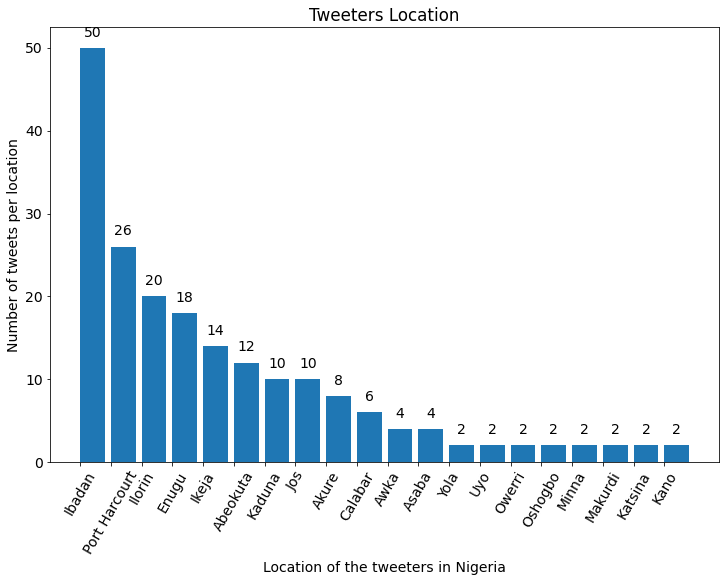

In [135]:
#plotting location against location count
plt.figure(figsize=(12, 8))
ax = plt.bar(location, location_count, align='edge')
plt.xlabel('Location of the tweeters in Nigeria')
plt.ylabel('Number of tweets per location')
plt.xticks(rotation= 60)

fig.tight_layout()
rects = ax.patches
for rect, label in zip(rects, location_count):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 1, label,
            ha='center', va='bottom')
plt.title('Tweeters Location')
plt.rcParams.update({'font.size': 14})
plt.show()

In [136]:
#Top 5 influencers that tweeted about Dr Dipo or engaged other people's post
followers = general_tweets[['username', 'followers']].sort_values(by= 'followers', ascending = False).drop_duplicates(subset = 'username')
## getting what they said
tweets_f = general_tweets.sort_values(by= 'followers', ascending = False).drop_duplicates(subset = 'username')[['username', 'text']] 
pd.set_option('display.max_colwidth', None)
print(tweets_f.iloc[1:6])
print(followers.iloc[1:6])

                            username                                                                                                                                                                                                                                                                                                                                                       text
tweetcreatedts                                                                                                                                                                                                                                                                                                                                                                                 
2021-03-25 08:47:43  MisterRedefined                                                             You Spitting rubbish was just a short while ago drolly over @OgbeniDipo DM. \nThe Problem with us is we seek the easy way out, without 

In [138]:
#Top 5 tweets that were retweeted as at this point
retweets = general_tweets[['username', 'retweetcount', 'text']].sort_values(by= 'retweetcount', ascending = False)
print(retweets.iloc[1:6])

                       username  ...                                                                                                                                                                                                                                                                                                   text
tweetcreatedts                   ...                                                                                                                                                                                                                                                                                                       
2021-04-04 12:33:05  dipo_smart  ...                                                                                                                                                           RT @markessien: Here is the Doctor who did the brain surgery - Dr. Omotayo Ojo (Consultant Neurosurgeon at Lagoos Hospital). https://t.co/V…
2021

Who is this Dipo_Ol sef?
He had the 5th highest number of tweet, now the 2nd highest  retweets
Recommendation: Round table meeting immediately!!!

In [ ]:
general_tweets[general_tweets['acctyear'] == 2013]

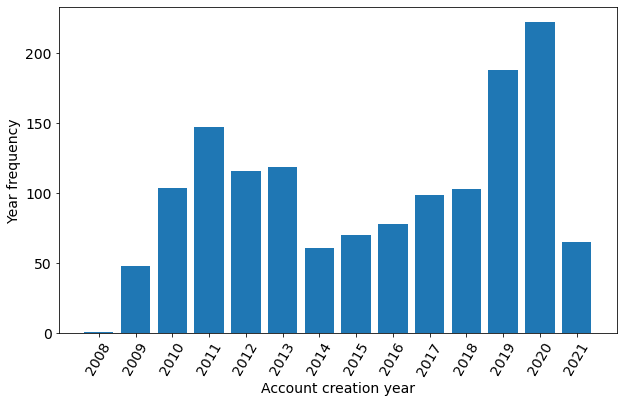

In [169]:
# account age distribution of the tweeters 
plt.figure(figsize=(10, 6))
years = [year  for year, df in general_tweets.groupby('acctyear')]
plt.bar(years, general_tweets.groupby('acctyear')['acctyear'].count())
plt.xticks(years)
plt.xlabel('Account creation year')
plt.ylabel('Year frequency')
plt.xticks(rotation= 60)
plt.show()

In [ ]:
###omo most of these people are new twitter users which indiccate that the maerket audince is probably teenagers dominated/


For effective exploratory analysis I will have to divide the data in week 1, 2, and 3. This is neccessary to avoid bias caused by the trend on 24-3-24

In [170]:
#getting index So I can drop the trend of 24th
general_tweets.index.get_loc('2021-3-24')

slice(303, 646, None)

In [179]:

no_bias =general_tweets.drop(general_tweets.index[303:646])

#week1 monday to sunday 2021-03-15 and 2021-03-21
week1 = general_tweets.loc['2021-3-15': '2021-3-21']
#week2 monday to sunday 2021-03-22 and 2021-03-28
week2 = no_bias.loc['2021-3-22': '2021-3-28']
#week3 monday to sunday 2021-03-22 and 2021-03-28
week3 = general_tweets.loc['2021-3-29': '2021-4-4']

In [172]:
print(week2.loc['2021-3-24'])

Empty DataFrame
Columns: [username, acctdesc, location, following, followers, totaltweets, usercreatedts, retweetcount, text, hashtags, likes, weekday, hour, acctyear]
Index: []


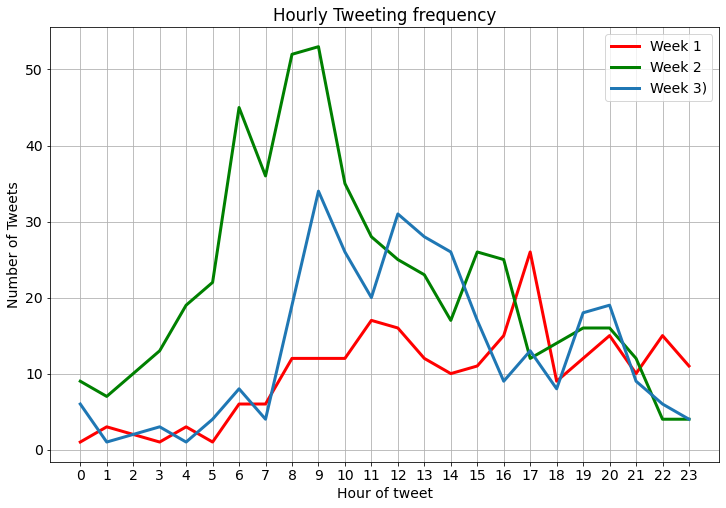

In [183]:
# Time of day the people tweeeted the most for all
plt.figure(figsize=(12, 8))
hours = [hour  for hour, df in general_tweets.groupby('hour')]
plt.plot(hours, week1.groupby('hour')['text'].count(), color = 'red', label = 'Week 1', linewidth = 3)
plt.plot(hours, week2.groupby('hour')['text'].count(),  color = 'green', Label = 'Week 2', linewidth = 3)
plt.plot(hours, week3.groupby('hour')['text'].count(), Label = 'Week 3)', linewidth = 3)
plt.xticks(hours)
plt.xlabel('Hour of tweet')
plt.ylabel('Number of Tweets')
plt.title('Hourly Tweeting frequency')
plt.grid()
plt.legend()
plt.show()


In [ ]:
#So these people tweet the most at 9am, next is 12pm and finally by 8pm

In [186]:
print(general_tweets.groupby('weekday').count())

         username  acctdesc  location  ...  likes  hour  acctyear
weekday                                ...                       
Fri           156        54       122  ...    100   156       156
Mon            71        54        57  ...     16    71        71
Sat           188        70       151  ...    111   188       188
Sun           150        24       121  ...    124   150       150
Thu           392        72       322  ...    316   392       392
Tue            65        45        51  ...     15    65        65
Wed           399       295       318  ...     91   399       399

[7 rows x 13 columns]


In [188]:
print( week1.groupby('weekday')['text'].count())

weekday
Fri    56
Mon    14
Sat    77
Sun    26
Thu    18
Tue    26
Wed    21
Name: text, dtype: int64


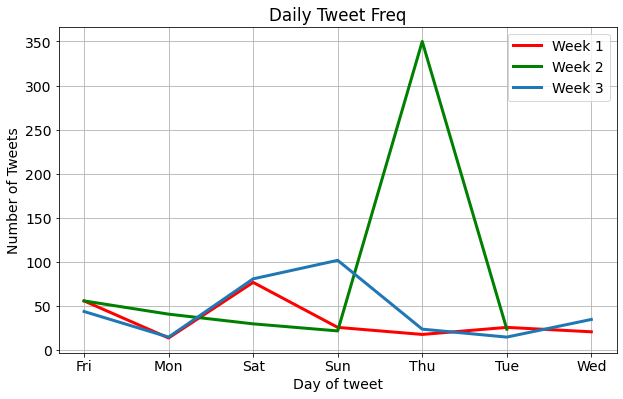

In [196]:
# Day of the week the people tweeeted the most
Days = [day  for day, df in general_tweets.groupby('weekday')]
plt.figure(figsize=(10, 6))
no_bias_days = [day  for day, df in week2.groupby('weekday')]
plt.plot(Days, week1.groupby('weekday')['text'].count(), color = 'red', label = 'Week 1', linewidth = 3)
plt.plot(no_bias_days,  week2.groupby('weekday')['text'].count(), color = 'green', Label = 'Week 2', linewidth = 3)
plt.plot(Days, week3.groupby('weekday')['text'].count(), Label = 'Week 3', linewidth = 3)
plt.xticks(Days)
plt.xlabel('Day of tweet')
plt.ylabel('Number of Tweets')
plt.title('Daily Tweet Freq')
plt.legend()
plt.grid()
plt.show()

There seems to be no pattern here, the tweet frequency is determined by how many tweets Dr Dipo drops for that day.
But on a general note Saturday seems quite positive as the Thursday in week 2 is actually the remnants of the giveaway saga which I removed already; then Friday follows showing a consistent pattern.

In [ ]:
#Sentiment Sentiment Sentiment

SyntaxError: ignored

In [199]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 8.8MB/s 


In [200]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [201]:
# intializing the sentimenter 
analyzer = SentimentIntensityAnalyzer()
# get sentiment score
sentiment = general_tweets['text'].apply(lambda x: analyzer.polarity_scores(x))
#put sentiment into dataframe
sentimented_tweets = pd.concat([general_tweets, sentiment.apply(pd.Series)],1)
sentimented_tweets.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,retweetcount,text,hashtags,likes,weekday,hour,acctyear,neg,neu,pos,compound
tweetcreatedts,,,,,,,,,,,,,,,,,,
2021-03-15 05:24:29,Ts_Czar,Nobody cares about you more than you do. Never outsource your happiness.,NaN,655.0,407,3968,2020-04-01 18:45:48,0,@OgbeniDipo Dipo's IQ has low IQ. That's why he forgets so soon.,[],NaN,Mon,5,2020,0.160,0.840,0.000,-0.2732
2021-03-15 06:54:49,_ipheoma,Love enthusiast/ambivert/believer/happy human.\n7th January... anyone?,"Lagos, Nigeria",381.0,510,3687,2017-03-17 12:58:31,0,@Aunty_Barbie @OgbeniDipo Likeeee!\n\nMe: *tears chicken*\n\nOgbeni Dipo: so you took 15th position out of 25 people? You don't make use of your school library dear?\n\nMe: https://t.co/eErt37wB6W,[],NaN,Mon,6,2017,0.061,0.835,0.104,0.3296
2021-03-15 11:12:08,realAdesanya,Data Analysts Enthusiast || @ManUtd,NaN,50.0,19,138,2021-01-16 09:15:17,0,Another wonder session with @OgbeniDipo about Networking to advance one’s career.\n\nNetworking should be a symbiotic relationship - Dr Dipo https://t.co/LFRG3K281l,[],NaN,Mon,11,2021,0.000,1.000,0.000,0.0000
2021-03-15 12:31:26,DeKINGKUDOS,PLUTOCRAT AMBITION.,Nigeria,93.0,57,627,2011-12-14 05:13:24,0,"@OgbeniDipo If you are on Twitter NG and you are not following Ogbeni Dipo,I swear you are not serious with your life.",[],NaN,Mon,12,2011,0.054,0.892,0.055,0.0057
2021-03-15 12:44:54,MyunusualSelf_,Blank,The Kings Landing,1397.0,1127,4047,2019-04-07 10:27:14,11,Dipo talked about how yummy our meals are especially the Jollof rice and two people sent me a dm making enquires about our Jollof rice in less than 2mins and 11people followed @_MummyMo also😂😂💃🏾💃🏾\n\nYou are the best @OgbeniDipo 😊🙌🏾,[],NaN,Mon,12,2019,0.044,0.709,0.247,0.9607


Text(0.5, 0, 'Sentiment Score')

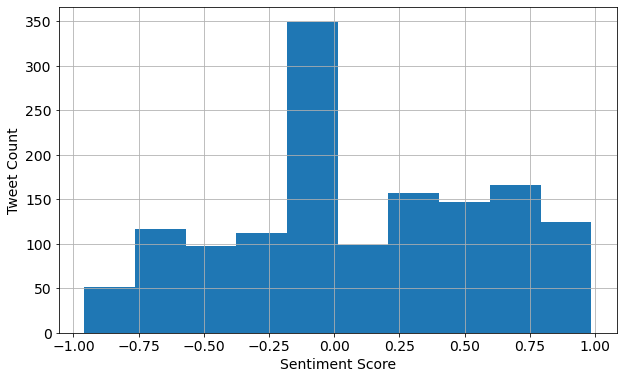

In [228]:
# account age distribution of the tweeters 
plt.figure(figsize=(10, 6))
sentimented_tweets['compound'].hist()
plt.ylabel('Tweet Count')
plt.xlabel('Sentiment Score')

Seems like the people were a little bit unhappy after all and it shakes off after a while.
